# Projeto 1 - EDA das Ofertas Relâmpago

## Autor: Sandro Saorin da Silva

## 

## Descrição do Projeto

O objetivo do projeto é utilizar o conjunto de dados `ofertas_relampago.csv` e realizar uma análise exploratória de dados com o intuito de conhecer melhor os dados e tirar _insights_ sobre o que aconteceu no período tratado e conclusões sobre estas ofertas.

Para desenvolver o projeto será separado em duas partes:

<br>

- __Limpeza e Tratamento dos Dados:__ Etapa necessária para garantir a qualidade e consistência dos dados, seja removendo dados duplicados, verificar dados faltantes entre outros pontos;

- __Feature Engineering:__ Criar variáveis que possam auxiliar nas análises e conclusões sobre as ofertas;

- __Análise Exploratória dos Dados:__ Momento que de fato serão feitas as análises, gráficos e desenvolver _insights_ sobre os dados.

<br>

### Limpeza e Tratamento dos Dados

In [1]:
# Bibliotecas para a manipulação dos dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Biblioteca para tratar as datas
from datetime import datetime

In [2]:
# Carrega o arquivo CSV
offers = pd.read_csv('ofertas_relampago.csv')

# Mostrar alguns linhas do dataset
offers.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES


#### Verificação de Dados Faltantes

In [3]:
# Utilizar .info para entender o preenchimento dos dados
offers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OFFER_START_DATE           48746 non-null  object 
 1   OFFER_START_DTTM           48746 non-null  object 
 2   OFFER_FINISH_DTTM          48746 non-null  object 
 3   OFFER_TYPE                 48746 non-null  object 
 4   INVOLVED_STOCK             48746 non-null  int64  
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64  
 6   SOLD_AMOUNT                24579 non-null  float64
 7   SOLD_QUANTITY              24579 non-null  float64
 8   ORIGIN                     11316 non-null  object 
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object 
 10  DOM_DOMAIN_AGG1            48746 non-null  object 
 11  VERTICAL                   48746 non-null  object 
 12  DOMAIN_ID                  48746 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usag

In [4]:
# Count dos valores faltantes
offers.isna().sum()

OFFER_START_DATE                 0
OFFER_START_DTTM                 0
OFFER_FINISH_DTTM                0
OFFER_TYPE                       0
INVOLVED_STOCK                   0
REMAINING_STOCK_AFTER_END        0
SOLD_AMOUNT                  24167
SOLD_QUANTITY                24167
ORIGIN                       37430
SHIPPING_PAYMENT_TYPE            0
DOM_DOMAIN_AGG1                  0
VERTICAL                         0
DOMAIN_ID                        0
dtype: int64

In [5]:
# Verificando se tem produtos que não foram vendidos ou dados com problemas
offers[['SOLD_AMOUNT', 'SOLD_QUANTITY']][offers['SOLD_AMOUNT'] <= 0]

,SOLD_AMOUNT,SOLD_QUANTITY


Percebe-se para as variáveis `SOLD_AMOUNT` e `SOLD_QUANTITY`, os dados faltantes representam produtoso que __não foram vendidos__, dessa forma venho sem prrenchimentos para essas variáveis.

Verificando que tipo de informação tem disponível na variável `ORIGIN`:

In [6]:
# Contagem das categorias dentro da variavel ORIGIN
offers['ORIGIN'].value_counts()

A    11316
Name: ORIGIN, dtype: int64

A variável `ORIGIN` tem apenas uma categoria além de não dar indícios de como poderia ser preenchido a variável. Portanto, o idela para evitar vieses será remover esta variável do conjunto de dados.

Outra variável com problema análogo é `OFFER_TYPE`:

In [7]:
# Contagem das categorias dentro da variavel OFFER_TYPE
offers['OFFER_TYPE'].value_counts()

lightning_deal    48746
Name: OFFER_TYPE, dtype: int64

Como este conjunto de dados deve ter originado de uma tabela externo onde teria outros elementos relevantes em `OFFER_TYPE`, mas aqui também não será relevante por ter apenas uma categorização também.

A seguir serão removidas então as variáveis `ORIGIN` e `OFFER_TYPE`:

In [8]:
# Removendo as variaveis não relevantes
offers.drop(['ORIGIN', 'OFFER_TYPE'], axis = 1, inplace = True)

Agora, será feito o preenchimento com zero, as demais variáveis com dados faltantes, ou seja, as variáveis `SOLD_AMOUNT` e `SOLD_QUANTITY`:

In [9]:
# Posso preencher os NaN Values com zero, são os produtos que não venderam nada na oferta relampago
offers.fillna(0, inplace = True)

## 

#### Verificação de dados duplicados

In [10]:
# Levantando a quantidade de dados duplicados
offers.duplicated().value_counts()

False    47820
True       926
dtype: int64

In [11]:
# Avaliando os dados duplicados
offers[offers.duplicated()].head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
60,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 21:00:00+00:00,20,20,0.0,0.0,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-KITCHEN_COOKWARE_SETS
83,2021-06-22,2021-06-22 15:00:00+00:00,2021-06-22 23:00:01+00:00,3,3,0.0,0.0,free_shipping,PETS FOOD,CPG,MLM-CATS_AND_DOGS_FOODS
87,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-23 00:00:00+00:00,5,5,0.0,0.0,free_shipping,PETS FOOD,CPG,MLM-CATS_AND_DOGS_FOODS
96,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-23 00:00:01+00:00,5,5,0.0,0.0,free_shipping,PETS FOOD,CPG,MLM-CATS_AND_DOGS_FOODS
98,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 16:00:00+00:00,3,3,0.0,0.0,free_shipping,PETS FOOD,CPG,MLM-CATS_AND_DOGS_FOODS


No caso dos dados duplicados, são realmente erros na hora de armazenar os dados na tabela, pois poderia ter alguma duplicada que fosse alguma ofertas que acabou não vendendo e ofertadas novamente, mas não é esse o caso pois os _timestamps_ também são iguais.

Neste caso, opta-se por remover também os dados duplicados:

In [12]:
# Removendo os dados duplicados
offers.drop_duplicates(keep = 'first', inplace = True)

In [13]:
# Shape final da base
offers.shape

(47820, 11)

In [14]:
# Olhando os registros que sobraram
offers.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,4,-2,4.72,6.0,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,5,5,0.00,0.0,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,15,12,10.73,3.0,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,15,13,7.03,2.0,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,15,0,39.65,15.0,none,COMPUTERS,CE,MLM-HEADPHONES


 A partir deste ponto, serão desenvolvidas novas variáveis que possam auxiliar nas análises do projeto.

## 

### _Feature Engineering_

A primeira das modificações será transforma a variável `SHIPPING_PAYMENT_TYPE` em uma marcação de se o produto teve entrega grátis ou não (único tipo de informação que possa ser retirado desta variável):

In [15]:
# Criando a variavel free shipping
offers['free_shipping'] = np.where(offers['SHIPPING_PAYMENT_TYPE'] == 'none', 0, 1)

Calculando o total em valores recebido em cada uma das ofertas relâmpago:

In [16]:
# Criando a variavel TOTAL_AMOUNT
offers['TOTAL_AMOUNT'] = offers['SOLD_AMOUNT']*offers['SOLD_QUANTITY']

Trabalhando um pouco agora encima das variáveis _datetime_, será removido a marcação de fuso horário para poder adequar a variável ao `timestamp` e criar a variável de horário de início e fim das ofertas:

In [17]:
# Datetime de inicio da oferta
# Remover a marcação de fuso horário
offers['offer_start'] = offers['OFFER_START_DTTM'].apply(lambda x: x[:19])
# Corrigi o formato do datetime da variável
offers['offer_start'] = offers['offer_start'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
# Criando a feature de hora
offers['offer_start_hour'] = offers['OFFER_START_DTTM'].apply(lambda x: x[11:16])

# Datetime do fim da oferta
# Remover a marcação de fuso horário
offers['offer_finish'] = offers['OFFER_FINISH_DTTM'].apply(lambda x: x[:19])
# Corrigi o formato do datetime da variável
offers['offer_finish'] = offers['offer_finish'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
# Criando a feature de hora
offers['offer_finish_hour'] = offers['OFFER_FINISH_DTTM'].apply(lambda x: x[11:16])

Vale ressaltar que só é válido remover a marcação de fuso horário, pois verificado e confirmado que todas as ofertas estavam em relação ao mesmo fuso:

In [18]:
# Verificando os fusos horários
fusos = offers['OFFER_START_DTTM'].apply(lambda x: x[19:])

# Contagem dos fusos horários
fusos.value_counts()

+00:00    47820
Name: OFFER_START_DTTM, dtype: int64

Agora falando sobre tempo que a oferta ficou disponível, serão criadas duas variáveis a respeito da duração das ofertas:

In [19]:
# Criando feature de tempo da oferta
offers['offer_duration'] = offers['offer_finish'] - offers['offer_start']

# Criando a feature de tempo de oferta em minutos
offers['offer_duration_min'] = offers['offer_duration'].apply(lambda x: round(x.total_seconds() / 60))

In [20]:
# Removendo as variáveis que não vão ser mais relevantes
offers.drop(['OFFER_START_DTTM', 'OFFER_FINISH_DTTM', 'SHIPPING_PAYMENT_TYPE', 'offer_duration'], axis = 1, inplace = True)

Última variável que possa ser relevante, seria justamente uma marcação de queima de estoque, ou seja, foram vendidos todos os elementos nas ofertas:

In [21]:
# Criando a variável de SOLD OUT
offers['SOLD_OUT'] = np.where(offers['REMAINING_STOCK_AFTER_END'] > 0, 0, 1)

In [22]:
# Tabela resultante
offers.head()

,OFFER_START_DATE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,free_shipping,TOTAL_AMOUNT,offer_start,offer_start_hour,offer_finish,offer_finish_hour,offer_duration_min,SOLD_OUT
0,2021-06-22,4,-2,4.72,6.0,PETS FOOD,CPG,MLM-BIRD_FOODS,0,28.32,2021-06-22 16:00:00,16:00,2021-06-22 23:02:43,23:02,423,1
1,2021-06-22,5,5,0.00,0.0,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS,1,0.00,2021-06-22 13:00:00,13:00,2021-06-22 19:00:02,19:00,360,0
2,2021-06-22,15,12,10.73,3.0,COMPUTERS,CE,MLM-SPEAKERS,0,32.19,2021-06-22 07:00:00,07:00,2021-06-22 13:00:01,13:00,360,0
3,2021-06-22,15,13,7.03,2.0,COMPUTERS,CE,MLM-HEADPHONES,0,14.06,2021-06-22 19:00:00,19:00,2021-06-23 01:36:12,01:36,396,0
4,2021-06-22,15,0,39.65,15.0,COMPUTERS,CE,MLM-HEADPHONES,0,594.75,2021-06-22 13:00:00,13:00,2021-06-22 15:48:12,15:48,168,1


## 

### Análise Exploratória dos Dados

Inicialmente avaliando o volume de vendas e total recebido pela vendas divididos nos macro grupos utilizando a variável `DOM_DOMAIN_AGG1`:

In [23]:
# Corrige a notação de casas decimais
pd.set_option('display.float_format', lambda x: '%.2f' % x)

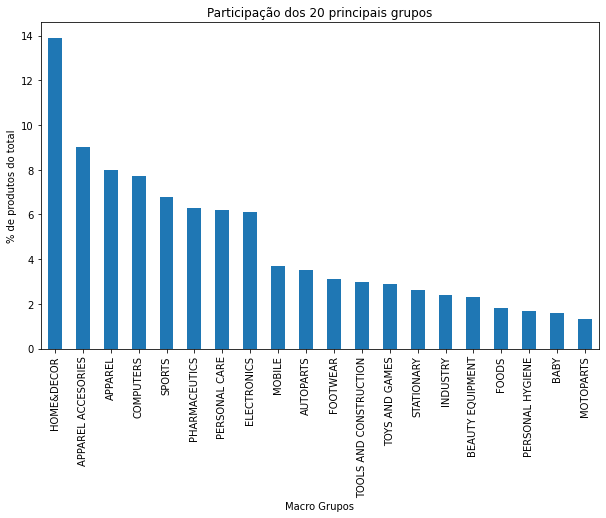

In [24]:
# Seta o tamanho da figura
plt.figure(figsize = (10, 6))

# Avalia o top 20 segmentos com mais produtos
np.round(offers['DOM_DOMAIN_AGG1'].value_counts(normalize = True)*100, 1).head(20).plot(kind = 'bar')

# Nome para o eixo X
plt.xlabel('Macro Grupos')

# nome para o eixo y
plt.ylabel('% de produtos do total')

# cria um titulo
plt.title("Participação dos 20 principais grupos")

# Mostra o grafico
plt.show()

Os top 20 grupos (de 36 avaliados no total) com maior percentual de produtos na base representam cerca de 94% do total de produtos ofertados na oferta relâmpago.

In [25]:
# Agregando pelo macro grupos
macros = offers[['DOM_DOMAIN_AGG1', 
                 'SOLD_QUANTITY', 
                 'TOTAL_AMOUNT',
                 'free_shipping',
                 'SOLD_OUT']].groupby('DOM_DOMAIN_AGG1').agg('sum')
# Calculo do ticket medio por macro grupo
macros['TICKET_MEDIO'] = macros['TOTAL_AMOUNT']/macros['SOLD_QUANTITY']
# Preenche com zeros os NaNs
macros.fillna(0, inplace = True)
# Ordena pelo o que mais arrecadou
macros[['SOLD_QUANTITY', 
        'TOTAL_AMOUNT',
        'TICKET_MEDIO']].sort_values(by='TOTAL_AMOUNT', ascending = False).head(10)

,SOLD_QUANTITY,TOTAL_AMOUNT,TICKET_MEDIO
DOM_DOMAIN_AGG1,,,
PHARMACEUTICS,147672.00,119242322.21,807.48
BEAUTY EQUIPMENT,24300.00,22278243.23,916.80
MOBILE,5498.00,3959088.88,720.10
ELECTRONICS,5149.00,1188129.38,230.75
HOME&DECOR,18268.00,1003751.85,54.95
APPAREL,7840.00,981439.48,125.18
COMPUTERS,11157.00,957664.93,85.84
INDUSTRY,2831.00,874515.15,308.91
APPAREL ACCESORIES,7652.00,691060.52,90.31


Quando fala-se sobre total arrecado, claramente os segmentos `PHARMACEUTICS` e `BEAUTY EQUIPMENT` foram os que tiveram mais retorno financeiro com as ofetas relâmpago, mas vale também ressaltar que quando olhado por ticket médio, ou seja, total arrecadado por unidade de produto vendida, outros segmentos acabam se destacando em relação aos demais como por exemplo o `INDUSTRY` ter um conversão maior que o `ELECTRONICS` apesar de um volume de vendas mais baixo:

In [26]:
# Ordena pelo ticket medio
macros[['SOLD_QUANTITY', 
        'TOTAL_AMOUNT',
        'TICKET_MEDIO']].sort_values(by='TICKET_MEDIO', ascending = False).head(10)

,SOLD_QUANTITY,TOTAL_AMOUNT,TICKET_MEDIO
DOM_DOMAIN_AGG1,,,
BEAUTY EQUIPMENT,24300.00,22278243.23,916.80
PHARMACEUTICS,147672.00,119242322.21,807.48
MOBILE,5498.00,3959088.88,720.10
INDUSTRY,2831.00,874515.15,308.91
ELECTRONICS,5149.00,1188129.38,230.75
WHEELS & TIRES,28.00,3685.66,131.63
APPAREL,7840.00,981439.48,125.18
VEHICULAR MULTIMEDIA,288.00,36005.92,125.02
SECURITY,1143.00,130173.60,113.89


Olhando ainda para os macro grupos, será avaliado a performance de cada grupo em relação a oferta de entrega grátis (`free_shipping`) e também em relação a produtos que esgotaram o estoque (`SOLD_OUT`):

In [27]:
# Determinando o total de produtos distintos
total_produtos = offers['DOM_DOMAIN_AGG1'].value_counts()

In [28]:
# Une com a base de macro grupos
macros = macros.merge(total_produtos.rename('TOTAL_PRODUTOS'), left_index=True, right_index=True)

In [29]:
# transforma o free_shipping e o SOLD_OUT em porcentagens
macros['free_shipping'] = np.round((macros['free_shipping']/macros['TOTAL_PRODUTOS'])*100, 1)
macros['SOLD_OUT'] = np.round((macros['SOLD_OUT']/macros['TOTAL_PRODUTOS'])*100, 1)

In [30]:
# Avaliando o free shipping
macros[['free_shipping',
        'TOTAL_AMOUNT',
        'TICKET_MEDIO']].sort_values(by='free_shipping', ascending = False).head(10)

,free_shipping,TOTAL_AMOUNT,TICKET_MEDIO
WHEELS & TIRES,100.00,3685.66,131.63
ANTIQUES & HOBBIES,100.00,312.35,31.24
MUSICAL INSTRUMENTS,100.00,1091.84,64.23
AGRO,100.00,0.00,0.00
SECURITY,91.20,130173.60,113.89
VEHICULAR MULTIMEDIA,90.20,36005.92,125.02
FOOTWEAR,89.10,102587.03,48.39
SUPLEMENTS,83.80,22766.16,55.12
ELECTRONICS,74.70,1188129.38,230.75
TOOLS AND CONSTRUCTION,70.80,188721.38,69.00


Os produtos que mais ofertaram frete grátis não performaram tão bem no quesito de atração nas vendas, arrecadando volumes mais baixos, indicando que talvez o incentivo de frete grátis foi uma forma adotada para tentar vender mais produtos desses segmentos, o que acabou não ocorrendo.

In [31]:
# Avaliando o SOLD_OUT
macros[['SOLD_OUT',
        'TOTAL_AMOUNT',
        'TICKET_MEDIO']].sort_values(by='SOLD_OUT', ascending = False).head(10)

,SOLD_OUT,TOTAL_AMOUNT,TICKET_MEDIO
PETS FOOD,25.10,36366.09,25.17
PHARMACEUTICS,15.40,119242322.21,807.48
SECURITY,14.10,130173.60,113.89
COMPUTERS,13.20,957664.93,85.84
BATTERIES,13.10,1692.68,9.25
OTHER,11.80,889.65,27.80
VEHICULAR MULTIMEDIA,11.80,36005.92,125.02
CLEANING,11.50,43051.37,35.97
AUTOPARTS,11.50,102692.88,26.56
SPORTS,10.10,314076.24,41.18


No caso da queima de estoque de produtos, nota-se que em percentual, poucos produtos por segmento chegaram a esgotar as vendas. O no que tange aos grupos de destaque, tirando o grupo `PHARMACEUTICS`, os demais grupos não foram significantes em questão de volume de vendas.

Fazendo o comparativo entre `free_shipping` e `SOLD_OUT`:

In [32]:
macros[['free_shipping',
        'SOLD_OUT']].sort_values(by='free_shipping', ascending = False).head(10)

,free_shipping,SOLD_OUT
WHEELS & TIRES,100.00,6.10
ANTIQUES & HOBBIES,100.00,0.00
MUSICAL INSTRUMENTS,100.00,8.30
AGRO,100.00,0.00
SECURITY,91.20,14.10
VEHICULAR MULTIMEDIA,90.20,11.80
FOOTWEAR,89.10,5.10
SUPLEMENTS,83.80,7.30
ELECTRONICS,74.70,7.50
TOOLS AND CONSTRUCTION,70.80,6.70


Avaliando as duas variáveis em conjunto só corrobora para a questão da estratégia de frete grátis para produtos que não venderam tanto, acabou não convertendo em números.

Entrando um pouco na granularidade por produtos e entender o contexto com o qual ocorreu as ofertas:

In [73]:
# Agregando pelos produtos
produtos = offers[['DOMAIN_ID', 
                 'SOLD_QUANTITY', 
                 'TOTAL_AMOUNT']].groupby('DOMAIN_ID').agg('sum')

# Calculo do ticket medio por macro grupo
produtos['TICKET_MEDIO'] = produtos['TOTAL_AMOUNT']/produtos['SOLD_QUANTITY']

# Preenche com zeros os NaNs
produtos.fillna(0, inplace = True)

# Ordena pelo o que mais arrecadou
produtos[['SOLD_QUANTITY', 
        'TOTAL_AMOUNT',
        'TICKET_MEDIO']].sort_values(by='TOTAL_AMOUNT', ascending = False).head(10)

,SOLD_QUANTITY,TOTAL_AMOUNT,TICKET_MEDIO
DOMAIN_ID,,,
MLM-SURGICAL_AND_INDUSTRIAL_MASKS,141369.00,116454331.01,823.76
MLM-DISPOSABLE_GLOVES,13477.00,16924732.32,1255.82
MLM-OXIMETERS,8632.00,5207688.67,603.30
MLM-CELLPHONES,1759.00,3178989.32,1807.27
MLM-THERMOMETERS,3777.00,2630059.33,696.34
MLM-CARD_PAYMENT_TERMINALS,715.00,751073.14,1050.45
MLM-HEADPHONES,4444.00,643172.69,144.73
MLM-T_SHIRTS,1566.00,620449.63,396.20
MLM-SUNGLASSES,1506.00,536954.03,356.54


Dado o contexto de pandemia na época que foi extraído esta base, não é surpresa que os produtos que mais trouxeram valor por ofertas relâmpago foram `mascaras`, `luvas` e `oxímetros`.

Olhando por ticket médio:

In [74]:
# Ordena pelo o que mais arrecadou
produtos[['SOLD_QUANTITY', 
        'TOTAL_AMOUNT',
        'TICKET_MEDIO']].sort_values(by='TICKET_MEDIO', ascending = False).head(10)

,SOLD_QUANTITY,TOTAL_AMOUNT,TICKET_MEDIO
DOMAIN_ID,,,
MLM-CELLPHONES,1759.00,3178989.32,1807.27
MLM-DISPOSABLE_GLOVES,13477.00,16924732.32,1255.82
MLM-TABLETS,405.00,507678.68,1253.53
MLM-TELEVISIONS,448.00,476037.41,1062.58
MLM-CARD_PAYMENT_TERMINALS,715.00,751073.14,1050.45
MLM-GAMEPADS_AND_JOYSTICKS,293.00,255836.87,873.16
MLM-SURGICAL_AND_INDUSTRIAL_MASKS,141369.00,116454331.01,823.76
MLM-MATTRESSES,52.00,38681.81,743.88
MLM-THERMOMETERS,3777.00,2630059.33,696.34


Interessante perceber que quando entra dentro dos grupos, alguns produtos têm um ticket médio muito mais alto que o do próprio macro grupo, como por exemplo `celulares` em relação ao grupo `ELECTRONICS`.

Próximo passo será avaliar os volumes de venda em quantidade e valor por horário de início das ofertas:

In [48]:
# Aplica o groupby
horarios = offers[['offer_start_hour', 
                 'SOLD_QUANTITY', 
                 'TOTAL_AMOUNT']].groupby('offer_start_hour').agg('sum')

# Reseta os indexs
horarios.reset_index(inplace = True)

# Mostra os resultados
horarios

,offer_start_hour,SOLD_QUANTITY,TOTAL_AMOUNT
0,00:00,0.00,0.00
1,01:00,97.00,37353.61
2,02:00,11.00,2194.15
3,03:00,25.00,26510.90
4,04:00,0.00,0.00
5,05:00,0.00,0.00
6,06:00,13.00,131.82
7,07:00,19585.00,644330.20
8,08:00,83.00,1514.51
9,09:00,1649.00,7308474.12


In [49]:
# Cria o ticket medio
horarios['TICKET_MEDIO'] = horarios['TOTAL_AMOUNT']/horarios['SOLD_QUANTITY']
horarios.fillna(0, inplace = True)

# Pegar total qntdes vendidas e total recebido
total_quantity = horarios['SOLD_QUANTITY'].sum()
total_amount = horarios['TOTAL_AMOUNT'].sum()

# Converte para porcentagens
horarios['SOLD_QUANTITY'] = np.round((horarios['SOLD_QUANTITY']/total_quantity)*100, 1)
horarios['TOTAL_AMOUNT'] = np.round((horarios['TOTAL_AMOUNT']/total_amount)*100, 1)

In [50]:
# Mostra agora a tabela em porcentagens
horarios

,offer_start_hour,SOLD_QUANTITY,TOTAL_AMOUNT,TICKET_MEDIO
0,00:00,0.00,0.00,0.00
1,01:00,0.00,0.00,385.09
2,02:00,0.00,0.00,199.47
3,03:00,0.00,0.00,1060.44
4,04:00,0.00,0.00,0.00
5,05:00,0.00,0.00,0.00
6,06:00,0.00,0.00,10.14
7,07:00,7.30,0.40,32.90
8,08:00,0.00,0.00,18.25
9,09:00,0.60,4.80,4432.06


<Figure size 864x576 with 0 Axes>

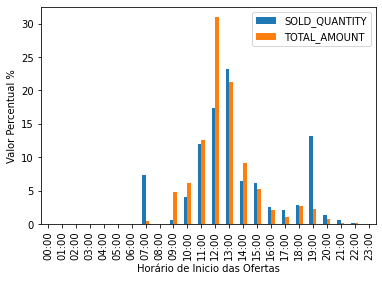

In [66]:
# Ajustando o tamanho da figura
plt.figure(figsize = (12, 8))

# Cria o gráfico
horarios.plot(x = 'offer_start_hour', 
              y = ['SOLD_QUANTITY', 'TOTAL_AMOUNT'],
              kind = 'bar')

# Cria um nome para o eixo X
plt.xlabel('Horário de Inicio das Ofertas')

# Cria um nome para o eixo X
plt.ylabel('Valor Percentual %')

# Cria um titulo
#plt.title('% nas Vendas em Relação ao início da Oferta')

# Mostra o grafico
plt.show()

A partir do horário de início das ofertas, percebe-se que os ho´rarios mais impactantes para as ofertas seria entre 11h e 13h, com representativos 52,5 % do volume de produtos vendidos e 64,9% do valor arrecadado em vendas. Salvo dois destaques atípicos com a distribuição (7h e 19h) que apresentaram valores de volume de produtos vendidos muito diferentes do restante da distribuição.

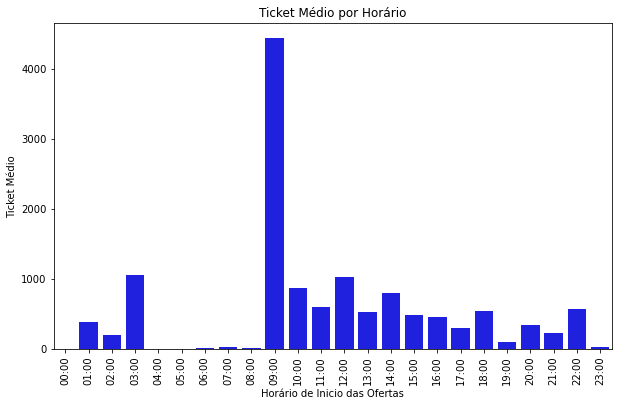

In [69]:
# Ajustando o tamanho da figura
plt.figure(figsize = (10, 6))

# Cria o gráfico
sns.barplot(x = 'offer_start_hour', 
            y = 'TICKET_MEDIO',
            data = horarios,
           color = 'Blue')

# Cria um nome para o eixo X
plt.xticks(rotation = 90)
plt.xlabel('Horário de Inicio das Ofertas')

# Cria um nome para o eixo X
plt.ylabel('Ticket Médio')

# Cria um titulo
plt.title('Ticket Médio por Horário')

# Mostra o grafico
plt.show()

Agora quando olha-se por ticket médio por horário, nota-se que as ofertas das 9h tem uma conversão por produto muito melhor do que os demais horários, que permanecer em valores menores que 1000 por produto.

In [54]:
# Aplica o groupby
horarios2 = offers[['offer_start_hour', 
                    'offer_duration_min']].groupby('offer_start_hour').agg('mean')

# reseta o indexs
horarios2.reset_index(inplace = True)

# Mostra a tabela
horarios2

,offer_start_hour,offer_duration_min
0,00:00,480.00
1,01:00,461.56
2,02:00,480.86
3,03:00,330.00
4,04:00,480.00
5,05:00,480.00
6,06:00,396.00
7,07:00,327.59
8,08:00,397.55
9,09:00,428.09


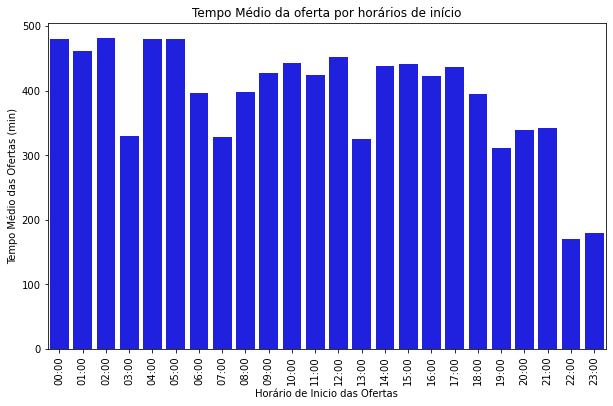

In [68]:
# Ajustando o tamanho da figura
plt.figure(figsize = (10, 6))

# Cria o gráfico
sns.barplot(x = 'offer_start_hour', 
            y = 'offer_duration_min',
            data = horarios2,
           color = 'Blue')

# Cria um nome para o eixo X
plt.xticks(rotation = 90)
plt.xlabel('Horário de Inicio das Ofertas')

# Cria um nome para o eixo X
plt.ylabel('Tempo Médio das Ofertas (min)')

# Cria um titulo
plt.title('Tempo Médio da oferta por horários de início')

# Mostra o grafico
plt.show()

Quando avaliado o tempo médio de duração de uma oferta pelo horário que a mesma iniciou, as ofertas iniciadas entre 22h e 23h tem um tempo médio aproximadamente 50% menor do que os demais horários.

## 

### Conclusões

A exploração do conjunto de dados sobre as ofertas reçlâmpago foi de grande valia principalmente para conhcer os principais segmentos de vendas, como cada um destes segmentos estão performando em relação ao demais, taxa de convergência (ticket médio), além de tirar alguns _insights_ bem interessantes sobre a relação das ofertas com os horários de início delas.

Muito dos _insights_ levantados seria de bom suporte para áreas estratégicas tomarem decisões sobre quais produtos abordar, horários e ter noções de uma ocnversão esperada.

## 